In [2]:
#导入数据
import pandas as pd
df = pd.read_csv('C:/Users/REGGIE/Desktop/数据分析资料/data/salary.csv',index_col=0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [3]:
#绘制线性回归图，X是dataframe,Y 是numpy的数组
from matplotlib import pyplot as plt
X = df[['year']]
Y = df[['salary']].values

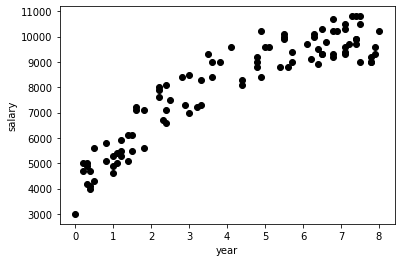

In [4]:
plt.scatter(X,Y, color = 'black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [5]:
#使用scikit-learn构建模型
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#将回归线绘制在图上
#系数为712，也就是每增长一年理论上工资就会涨712
#当X等于0时，Y的值为5049（刚来公司的人，底薪为5049）
print('Coefficient{}'.format(regr.coef_))
print('Intercept{}'.format(regr.intercept_))

Coefficient[[712.59413615]]
Intercept[5049.00989981]


In [8]:
#线性回归的预测，X就是之前上面年份的dataframe
#regr.predict(X)

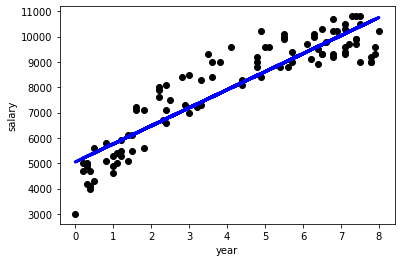

In [9]:
plt.scatter(X,Y,color = 'black')
plt.plot(X,regr.predict(X), linewidth = 3, color = 'blue')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [11]:
#多项式线性回归，因为薪资不可能无限增长，所以单项式的线性回归是不正确的。
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#degree等于2，也就是2项式的线性回归
poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

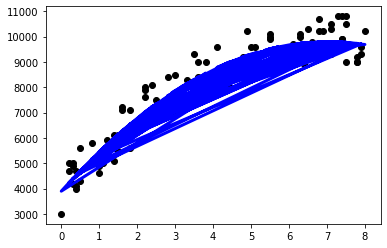

In [13]:
plt.scatter(X,Y, color = 'black')
plt.plot(X,regr.predict(X_),color = 'blue',linewidth=3)
plt.show()
#因为没有对X进行排序，所以图上面的点是根据index的，所以不是一条线。那么就要进行排序

In [14]:
#对X进行排序
#对排序后的X进行多项式回归转换
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)

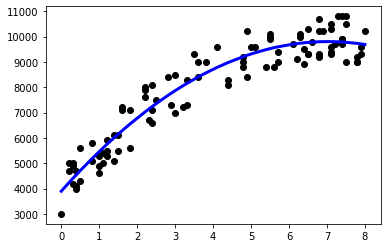

In [15]:
plt.scatter(X,Y, color = 'black')
plt.plot(X2,regr.predict(X2_),color = 'blue',linewidth=3)
plt.show()

# 多元线性回归模型

In [17]:
import pandas as pd
df = pd.read_csv('C:/Users/REGGIE/Desktop/数据分析资料/data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [16]:
#产生Dummy variable
#pd.get_dummies(df['Brick'])
#pd.get_dummies(df['Neighborhood'])
#当把一些类别转换为dummy_variable时要去掉一个，避免产生Multicollinearity的问题，永远只留一个dummy_variable就可以了

In [18]:
house = pd.concat([df,pd.get_dummies(df['Brick']),pd.get_dummies(df['Neighborhood'])],axis = 1)
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [20]:
X = house[['SqFt','Bedrooms','Bathrooms','Offers','Yes','East','North']]
Y = house['Price'].values

In [21]:
#建立预测模型
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#预测结果
regr.predict(X)

array([103182.88325028, 116127.48050967, 113047.47841973, 109230.99957752,
       125063.33919194, 108460.31885328, 148704.1829466 , 153525.7716034 ,
       120366.97977446, 103865.84286795, 129178.03614553, 124719.73204259,
        98814.52852196, 128446.1660185 , 167661.38200801, 141655.63841392,
       137272.82484975, 110937.30627969, 123978.2844232 , 161741.1079378 ,
        99162.18882362, 103583.96519486,  95423.39386208, 119609.92969489,
       159114.47019421, 139349.71073264, 136779.2847555 , 102660.24046903,
        86407.16329753, 180614.63904496, 175208.34797844, 129459.93561064,
       148719.93761665, 150535.84930595, 107604.65962152, 123974.23127089,
       109512.89904262, 158652.44607031, 134229.22007367, 106340.56922088,
        99261.81118229, 144451.05303714, 105514.14309396, 139883.70129304,
       162800.982754  , 100222.06363982, 123225.48902465,  89698.67559875,
       113251.69400417, 113250.68079769, 132887.59800223, 100185.53590812,
       115169.51091764, 1

In [27]:
#回归模型的评估
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())
#P>|t|越高表示虚无假设成立可能越高，表示这个因变量和自变量没有关系 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           8.25e-50
Time:                        15:57:48   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [31]:
#假设显著性标准是0.01
#推翻虚无假设的标准是P值<0.01
#t = 2.658 p|>t| = 0.09
#验证两者关系显著
#F值越大，多元回归模型越有效
#R越大准确度越高（R>0.06准确度较高）
#优先考虑AIC最小的那个模型

In [31]:
#对于选取最小AIC模型的处理，combinations列出不同的组合，这里设为1，所以只有一种组合
predictorcols = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North']
import itertools
for variables in itertools.combinations(predictorcols, 1):
    print(variables)

('SqFt',)
('Bedrooms',)
('Bathrooms',)
('Offers',)
('Yes',)
('East',)
('North',)


In [35]:
import itertools
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors  = X[list(variables)]
        predictors2 = sm.add_constant(predictors.values)
        est = sm.OLS(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic

#AICs

In [36]:
from collections import Counter
c = Counter(AICs)
#c.most_common()
#取AIC最小的模型
c.most_common()[::-10]

[(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
  2729.3189814012494),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes'), 2789.5148143560264),
 (('SqFt', 'Offers', 'East', 'North'), 2805.929045591597),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'East', 'North'), 2827.1498026886024),
 (('Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East'), 2837.9283737790706),
 (('Bedrooms', 'Bathrooms', 'Offers', 'Yes'), 2845.973295559599),
 (('SqFt', 'Offers'), 2865.6942475349356),
 (('Bedrooms', 'Bathrooms', 'Offers', 'East'), 2874.0450207228523),
 (('Bedrooms', 'Bathrooms', 'Yes'), 2883.9535408052025),
 (('SqFt', 'Yes'), 2896.9093592727936),
 (('Bedrooms', 'North'), 2908.6992372764653),
 (('Bedrooms', 'Bathrooms'), 2916.035689947397),
 (('Bathrooms',), 2936.1658574541634)]